In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [2]:
# carica dati 
data = pd.read_csv('/timeseries/AereoportoBLQ_20170416_20170817')

FileNotFoundError: [Errno 2] No such file or directory: '/timeseries/AereoportoBLQ_20170416_20170817'

In [54]:
# rimpiazza tutti valori '65535' con NaN
data = data.replace(65535, np.nan)
# sostituisci i NaN con l'ultimo valore conosciuto.
#data = data.fillna(method = 'ffill')

In [55]:
# rinomina i campi  
data.rename(columns={'486-1252':'cell_num','36':'nr_people'}, inplace=True)

In [56]:
# funzione che crea un campo 'date' nel formato yyyy-mm-dd 
li = []
def sistema_data(l):
    for i in data['20170416_0000']: 
        date_ymd = i[:8]
        year = date_ymd[:4]
        month = date_ymd[4:6]
        day = date_ymd[6:8]
        ymd_string = year+'-'+month+'-'+day
        #print( ymd_string)
        l.append(ymd_string)
        
    return l
    
l2 = sistema_data(li)

data['date'] = l2   

In [57]:
# crea un campo 'is_business_day' con valore binario
business_day = []

def find_business_days(business_day):
    for i in data.date:
        #print(i)
        s = i.split('-')
        year = int(s[0])
       # print(year, '----------------_>>>>><')
        month = int(s[1])
        day = int(s[2])
        ##print(day, ' ', month, ' ', year)
    
        dayofweek = datetime.date(year, month, day).strftime("%A")
        if ((dayofweek == 'Saturday') | (dayofweek == 'Sunday')): 
            business_day.append(0)
        else: 
            business_day.append(1)
     
    return business_day

bd = find_business_days(business_day)
data['is_business_day']= bd  

In [58]:
# crea campo 'is_public_holiday'
# crea un campo 'is_business_day' con valore binario
holiday = []

def find_holiday_days(holiday):
    for i in data.date:
        #print(i)
        if ((i == '2017-04-16') | (i == '2017-04-17') | (i == '2017-04-25') | 
            (i == '2017-05-01') | (i == '2017-06-02') | (i == '2017-08-15')): 
            holiday.append(1)
        else: 
            holiday.append(0)
     
    return holiday

hd = find_holiday_days(holiday)
data['is_holiday']= hd  
data

20170416_0000  cell_num  nr_people        date  is_business_day  \
0        20170416_0000  486-1253     39.000  2017-04-16                0   
1        20170416_0000  486-1254     41.000  2017-04-16                0   
2        20170416_0000  486-1255     41.000  2017-04-16                0   
3        20170416_0000  486-1256     43.000  2017-04-16                0   
4        20170416_0000  486-1257     44.000  2017-04-16                0   
...                ...       ...        ...         ...              ...   
2609562  20170816_2345  498-1264        nan  2017-08-16                1   
2609563  20170816_2345  498-1265        nan  2017-08-16                1   
2609564  20170816_2345  498-1266        nan  2017-08-16                1   
2609565  20170816_2345  498-1267        nan  2017-08-16                1   
2609566  20170816_2345  498-1268        nan  2017-08-16                1   

         is_holiday  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
2609562           0  
2609563           0  
2609564           0  
2609565           0  
2609566           0  

[2609567 rows x 6 columns]

In [59]:
# prendi solo i campi di interesse 
data = data[['date', 'cell_num', 'nr_people', 'is_business_day', 'is_holiday']]

In [60]:
data.head()

date  cell_num  nr_people  is_business_day  is_holiday
0  2017-04-16  486-1253     39.000                0           1
1  2017-04-16  486-1254     41.000                0           1
2  2017-04-16  486-1255     41.000                0           1
3  2017-04-16  486-1256     43.000                0           1
4  2017-04-16  486-1257     44.000                0           1

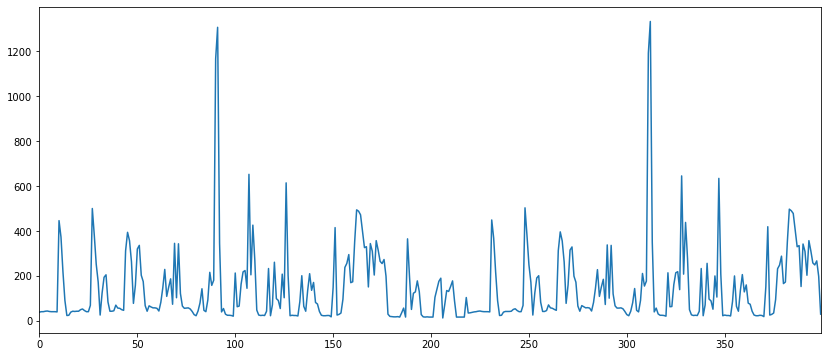

In [61]:
data.nr_people[0:400].plot( figsize = (14, 6));

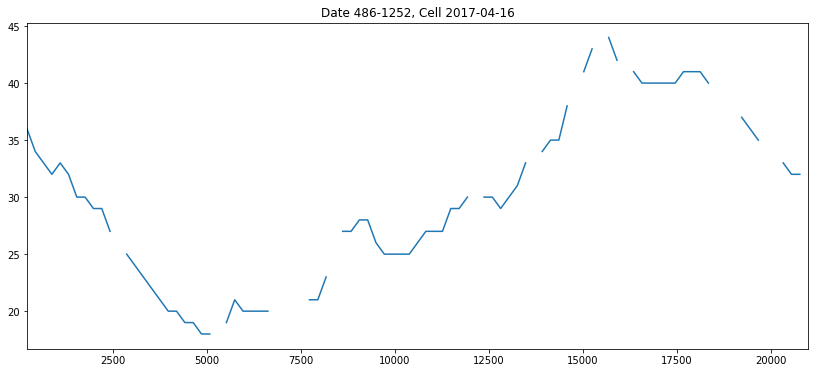

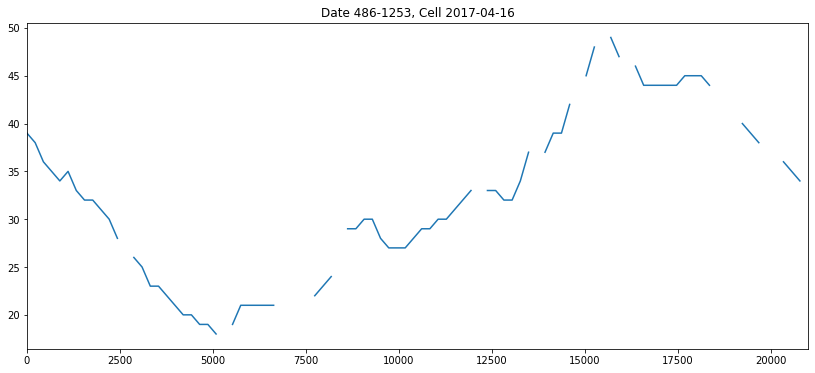

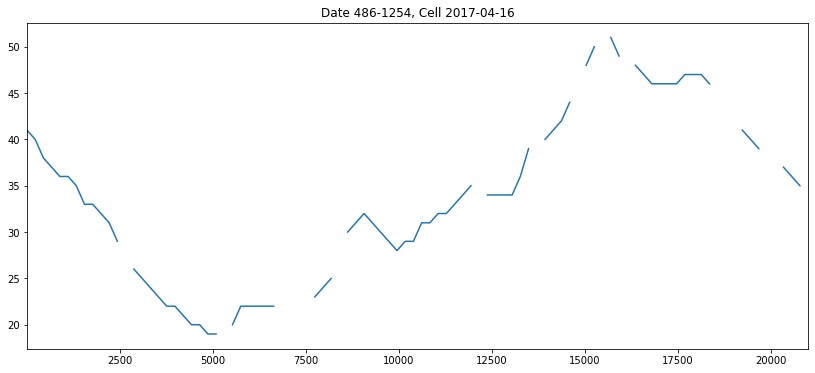

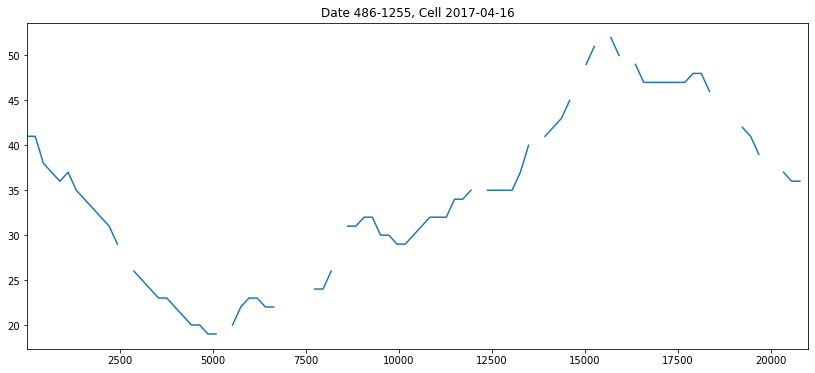

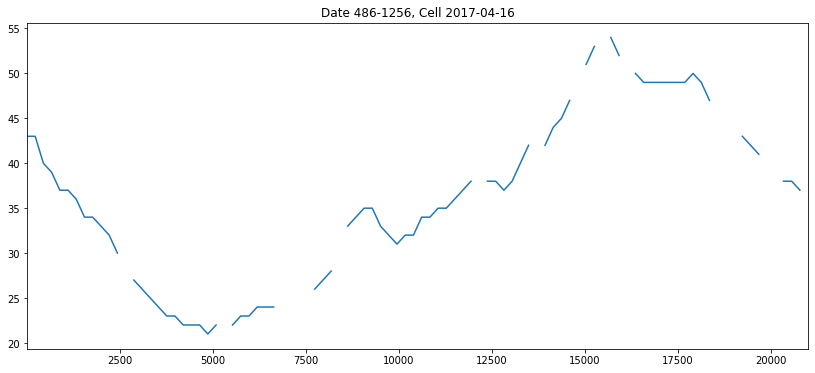

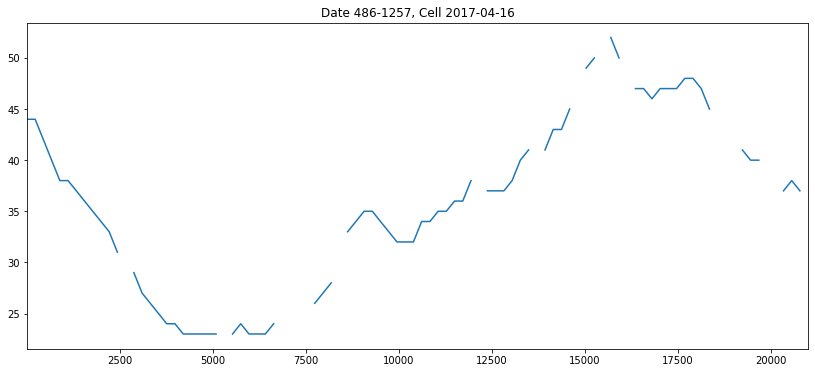

In [62]:
agg_date_cell = data.groupby(['date', 'cell_num'])
count = 0
for i, k in agg_date_cell:
    ##print(i[1])
    #k.set_index('date')
    count +=1
    k['nr_people'].plot(figsize= (14,6), title='Date '+i[1]+', Cell '+i[0]);
    plt.show()
    if count > 5: 
        break

### Lag scatter plots
<p>
In time series modeling, we assume there is a relationship between the observation done in t0 and the previous observation in t-1. Those previous observations done in t-1, t-2 etc.. in a time series are called lags. We can then make a scatter plot with those lags to explore the relationship between each observation and its lag.    
</p> 


In [49]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

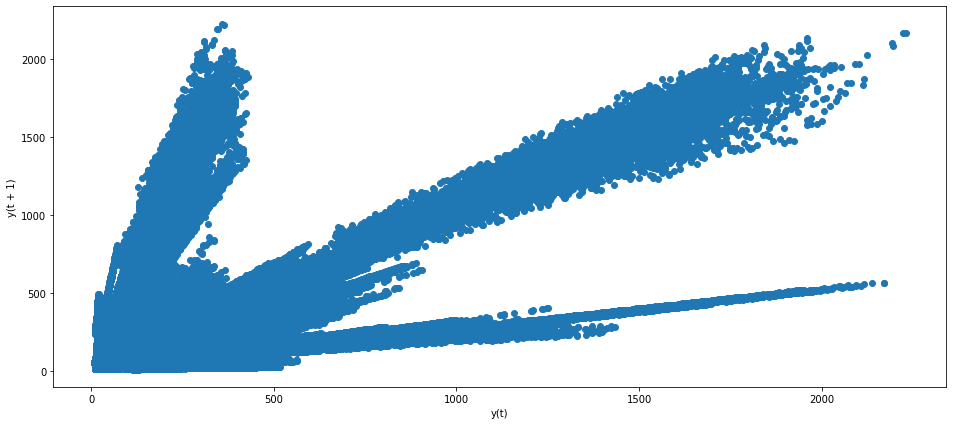

In [12]:
plt.figure(figsize=(16,7))
lag_plot(data['nr_people'])
plt.show();

In [13]:
# trova le osservazioni fatte nei giorni lavorativi e negli weekend 
business_days = data[data['is_business_day']==1]
weekends = data[data['is_business_day']==0]

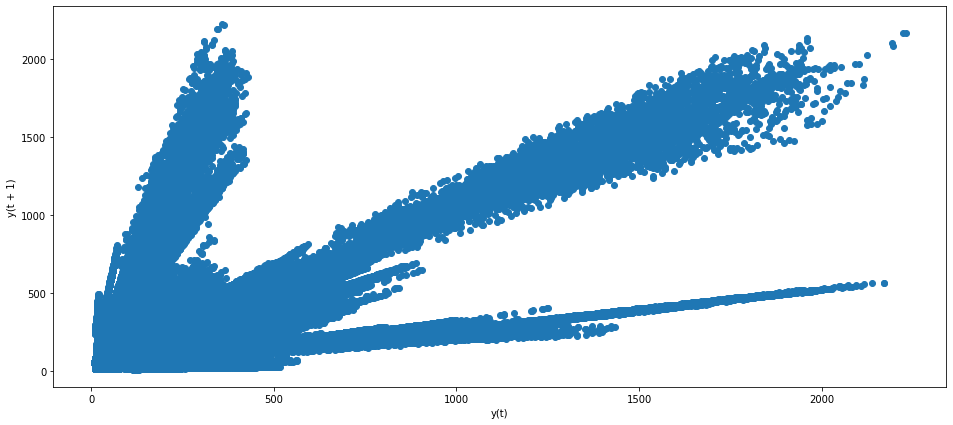

In [14]:
plt.figure(figsize=(16,7))
lag_plot(business_days['nr_people'])
plt.show();

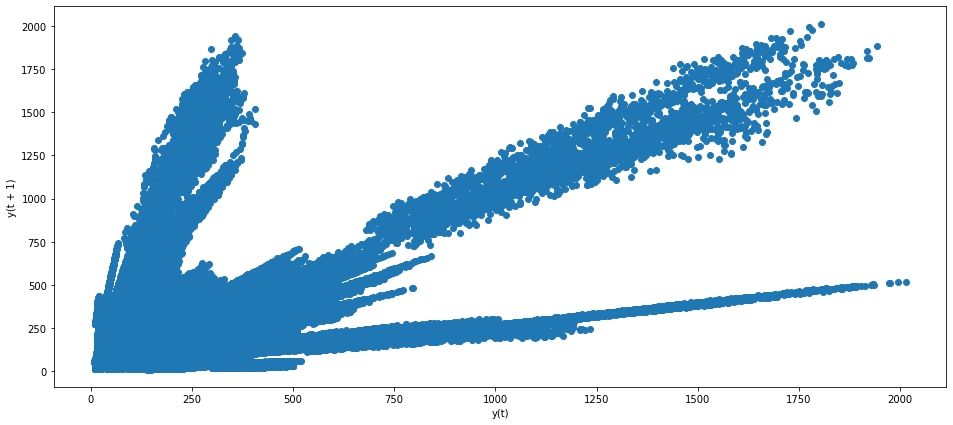

In [15]:
plt.figure(figsize=(16,7))
lag_plot(weekends['nr_people'])
plt.show();

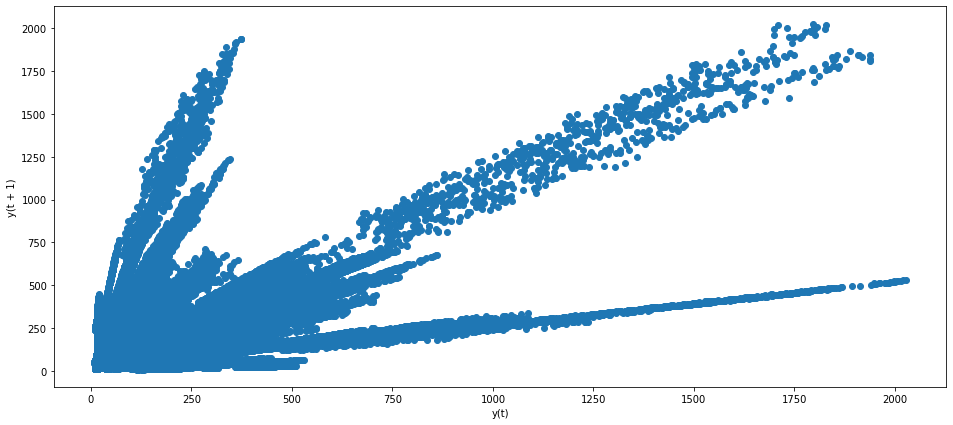

In [16]:
# trova le osservazioni fatte nei giorni lavorativi e negli weekend 
holidays = data[data['is_holiday']==1]

plt.figure(figsize=(16,7))
lag_plot(holidays['nr_people'])
plt.show();

In [17]:
# aggregate by date
agg_by_date = data.groupby(by = ['date'])
print('giorni = ', len(agg_by_date))

# aggregate by cell_num
agg_by_cell = data.groupby(by = ['cell_num'])
print('celle = ', len(agg_by_cell))

giorni =  123
celle =  221


In [18]:
for i, k in agg_by_date:
    print(i, k)

2017-04-16              date  cell_num  nr_people  is_business_day  is_holiday
0      2017-04-16  486-1253       39.0                0           1
1      2017-04-16  486-1254       41.0                0           1
2      2017-04-16  486-1255       41.0                0           1
3      2017-04-16  486-1256       43.0                0           1
4      2017-04-16  486-1257       44.0                0           1
...           ...       ...        ...              ...         ...
21210  2017-04-16  498-1264        NaN                0           1
21211  2017-04-16  498-1265        NaN                0           1
21212  2017-04-16  498-1266        NaN                0           1
21213  2017-04-16  498-1267        NaN                0           1
21214  2017-04-16  498-1268        NaN                0           1

[21215 rows x 5 columns]
2017-04-17              date  cell_num  nr_people  is_business_day  is_holiday
21215  2017-04-17  486-1252       33.0                1           1


[21216 rows x 5 columns]
2017-05-01               date  cell_num  nr_people  is_business_day  is_holiday
318239  2017-05-01  486-1252       32.0                1           1
318240  2017-05-01  486-1253       35.0                1           1
318241  2017-05-01  486-1254       37.0                1           1
318242  2017-05-01  486-1255       37.0                1           1
318243  2017-05-01  486-1256       36.0                1           1
...            ...       ...        ...              ...         ...
339450  2017-05-01  498-1264       17.0                1           1
339451  2017-05-01  498-1265       17.0                1           1
339452  2017-05-01  498-1266       17.0                1           1
339453  2017-05-01  498-1267      112.0                1           1
339454  2017-05-01  498-1268       37.0                1           1

[21216 rows x 5 columns]
2017-05-02               date  cell_num  nr_people  is_business_day  is_holiday
339455  2017-05-02  486-1252  

2017-06-20                date  cell_num  nr_people  is_business_day  is_holiday
1379039  2017-06-20  486-1252       50.0                1           0
1379040  2017-06-20  486-1253       55.0                1           0
1379041  2017-06-20  486-1254       58.0                1           0
1379042  2017-06-20  486-1255       60.0                1           0
1379043  2017-06-20  486-1256       61.0                1           0
...             ...       ...        ...              ...         ...
1400250  2017-06-20  498-1264       20.0                1           0
1400251  2017-06-20  498-1265       21.0                1           0
1400252  2017-06-20  498-1266       21.0                1           0
1400253  2017-06-20  498-1267      134.0                1           0
1400254  2017-06-20  498-1268       45.0                1           0

[21216 rows x 5 columns]
2017-06-21                date  cell_num  nr_people  is_business_day  is_holiday
1400255  2017-06-21  486-1252       48.0  

[21216 rows x 5 columns]
2017-07-01                date  cell_num  nr_people  is_business_day  is_holiday
1612415  2017-07-01  486-1252       52.0                0           0
1612416  2017-07-01  486-1253       57.0                0           0
1612417  2017-07-01  486-1254       59.0                0           0
1612418  2017-07-01  486-1255       61.0                0           0
1612419  2017-07-01  486-1256       62.0                0           0
...             ...       ...        ...              ...         ...
1633626  2017-07-01  498-1264       19.0                0           0
1633627  2017-07-01  498-1265       18.0                0           0
1633628  2017-07-01  498-1266       18.0                0           0
1633629  2017-07-01  498-1267      113.0                0           0
1633630  2017-07-01  498-1268       38.0                0           0

[21216 rows x 5 columns]
2017-07-02                date  cell_num  nr_people  is_business_day  is_holiday
1633631  2017-07-

In [19]:
# crea una feature media 'mean' 
d_cell = {}
for i, k in agg_by_cell: 
    #print(i, k)
    d_cell[i] = int(k['nr_people'].mean())  
    
val = []

for i in data['cell_num']:
    val_i = d_cell.get(i)
    val.append(val_i)
        
data['mean']= val 
data    
    

date  cell_num  nr_people  is_business_day  is_holiday  mean
0        2017-04-16  486-1253       39.0                0           1    48
1        2017-04-16  486-1254       41.0                0           1    50
2        2017-04-16  486-1255       41.0                0           1    51
3        2017-04-16  486-1256       43.0                0           1    51
4        2017-04-16  486-1257       44.0                0           1    47
...             ...       ...        ...              ...         ...   ...
2609562  2017-08-16  498-1264        NaN                1           0    18
2609563  2017-08-16  498-1265        NaN                1           0    18
2609564  2017-08-16  498-1266        NaN                1           0    18
2609565  2017-08-16  498-1267        NaN                1           0   115
2609566  2017-08-16  498-1268        NaN                1           0    38

[2609567 rows x 6 columns]

In [20]:
# imposta formato dati per evitare formattazione scientifica.
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data['mean'].describe()

count   2609567.000
mean        150.204
std         171.649
min          12.000
25%          40.000
50%          76.000
75%         220.000
max        1257.000
Name: mean, dtype: float64

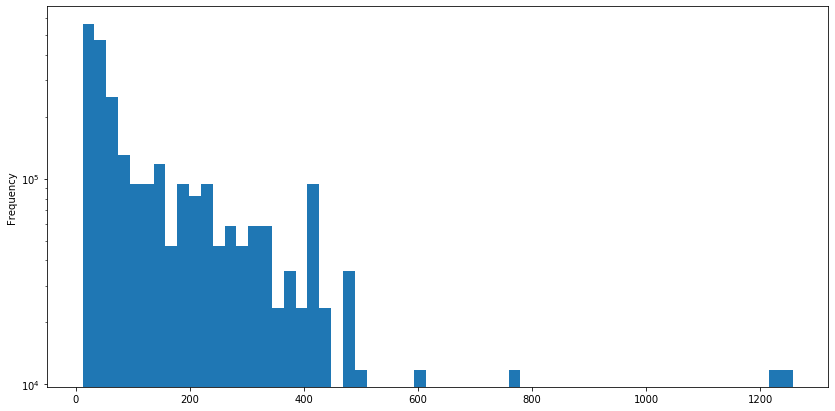

In [21]:
data['mean'].plot(kind = 'hist', figsize = (14, 7), bins = 60, log = True);

<p>Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value ≤ 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.</p>

In [28]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
# calculate stationarity test of time series data
from statsmodels.tsa.stattools import adfuller


data_trend = data[['date', 'nr_people']]

In [29]:
#a = np.array(len(data['date']))
l = []
for i in data_trend['nr_people']:
    l.append(int(i))
    
X = np.asarray(l) 

ValueError: cannot convert float NaN to integer

In [ ]:
X = X[0:100000]
result = adfuller(X)

In [ ]:
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [6]:
import numpy as np
a = np.array([[0,1],[2,3]])
a = np.resize(a, (1,6))
a

array([[0, 1, 2, 3, 0, 1]])